In [1]:
# Load necessary packages 
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [3]:
# Load data 
# Data provided by the Globalise project: https://globalise.huygens.knaw.nl/ contact them for a copy
df_cargo  = pd.read_csv('bgb_cargo.tsv', sep='\t',skiprows=1)
df_product = pd.read_csv('bgb_product.tsv', sep='\t',skiprows=1)
df_voyage = pd.read_csv('bgb_voyage.tsv', sep='\t',skiprows=1)

/var/folders/5g/vgjq024s5fgc9pf2fchw5m6c0000gn/T/ipykernel_77604/348064162.py:3: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cargo  = pd.read_csv('bgb_cargo.tsv', sep='\t',skiprows=1)


In [4]:
# Some hacky code to merge the different dataframes 
df_intermediate = df_cargo.merge(df_product,left_on='carProductId', right_on='id', how='left')
df = df_intermediate.merge(df_voyage, left_on='carVoyageId', right_on='voyId',how='left')

In [5]:
# and clean it up so only the relevant columns are present 
pruned_dataframe = df[['naam', 'carQuantity','carValue', 'carValueGuldens',
                       'carValueStuivers','carValuePenningen','voyBookingYear']].copy()

In [6]:
# Select the opium rows in the dataframe and group them by value 
tea_rows = pruned_dataframe.loc[pruned_dataframe['naam'] == 'thee']
tea_value_per_year = tea_rows.groupby('voyBookingYear', as_index=False)['carValueGuldens'].mean()
# Get number of ships that transport opium per year 
tea_counter = tea_rows.groupby('voyBookingYear').size().reset_index(name='counts')
tea_counter['naam']='thee'

In [8]:
# Select the opium rows in the dataframe and group them by value 
opium_rows = pruned_dataframe.loc[pruned_dataframe['naam'] == 'opium']
opium_value_per_year = opium_rows.groupby('voyBookingYear', as_index=False)['carValueGuldens'].mean()
# Get number of ships that transport opium per year 
opium_counter = opium_rows.groupby('voyBookingYear').size().reset_index(name='counts')
opium_counter['naam']='opium'

In [9]:
# Do the same for pepper, cinnamon, mace and nutmet 
peper_rows = pruned_dataframe.loc[pruned_dataframe['naam'] == 'peper']
peper_counter = peper_rows.groupby('voyBookingYear').size().reset_index(name='counts')
peper_counter['naam']='pepper'
kaneel_rows = pruned_dataframe.loc[pruned_dataframe['naam'] == 'kaneel']
kaneel_counter = kaneel_rows.groupby('voyBookingYear').size().reset_index(name='counts')
kaneel_counter['naam']='cinnamon'
foelie_rows = pruned_dataframe.loc[pruned_dataframe['naam'] == 'foelie']
foelie_counter = foelie_rows.groupby('voyBookingYear').size().reset_index(name='counts')
foelie_counter['naam']='mace'
nootmuskaat_rows = pruned_dataframe.loc[pruned_dataframe['naam'] == 'nootmuskaat']
nootmuskaat_counter = nootmuskaat_rows.groupby('voyBookingYear').size().reset_index(name='counts')
nootmuskaat_counter['naam']='nutmeg'

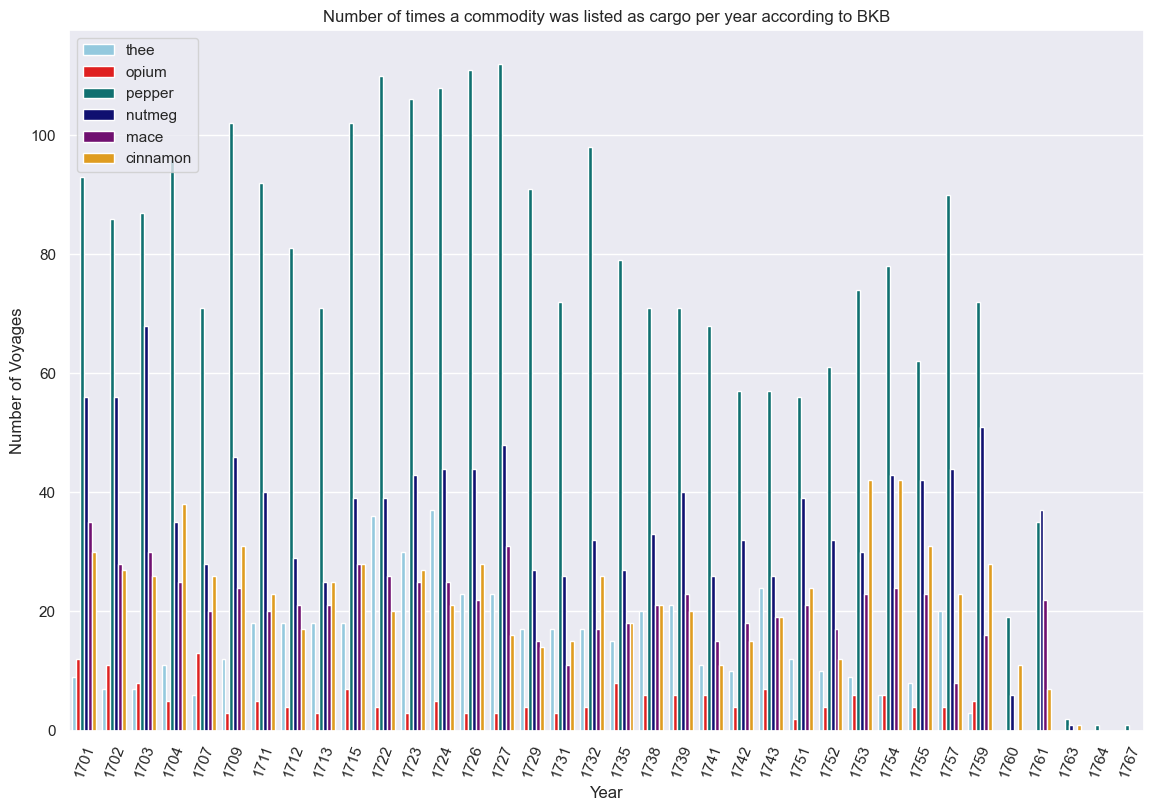

In [16]:
# Bar plot for the number of times opium, pepper, nutmeg, mace, and cinnamon were shipped by the VOC per year 
dss = pd.concat([tea_counter, opium_counter, peper_counter, nootmuskaat_counter, foelie_counter, kaneel_counter])
dss.voyBookingYear = dss.voyBookingYear.astype(int)
dss = dss[(dss['voyBookingYear'] < 1768)]

sns.set(rc={'figure.figsize':(11.7,8.27)})
commodities_palette = ['skyblue','red', 'teal', 'navy', 'purple', 'orange']
ax = sns.barplot(x='voyBookingYear', y='counts', palette=commodities_palette, hue='naam', data=dss)
ax.set(xlabel='Year', ylabel='Number of Voyages', title='Number of times a commodity was listed as cargo per year according to BKB')
plt.legend(title="")
plt.xticks(rotation=70)
plt.tight_layout()

In [29]:
tarwe_rows = pruned_dataframe.loc[pruned_dataframe['naam'] == 'tarwe']
tarwe_counter = tarwe_rows.groupby('voyBookingYear').size().reset_index(name='counts')
tarwe_counter['naam']='tarwe'

rijst_rows = pruned_dataframe.loc[pruned_dataframe['naam'] == 'rijst']
rijst_counter = rijst_rows.groupby('voyBookingYear').size().reset_index(name='counts')
rijst_counter['naam']='rijst'

zeep_rows = pruned_dataframe.loc[pruned_dataframe['naam'] == 'zeep']
zeep_counter = zeep_rows.groupby('voyBookingYear').size().reset_index(name='counts')
zeep_counter['naam']='zeep'

arak_rows = pruned_dataframe.loc[pruned_dataframe['naam'] == 'arak']
arak_counter = arak_rows.groupby('voyBookingYear').size().reset_index(name='counts')
arak_counter['naam']='arak'

laken_rows = pruned_dataframe.loc[pruned_dataframe['naam'] == 'laken']
laken_counter =laken_rows.groupby('voyBookingYear').size().reset_index(name='counts')
laken_counter['naam']='laken'

wijn_rows = pruned_dataframe.loc[pruned_dataframe['naam'] == 'wijn']
wijn_counter = wijn_rows.groupby('voyBookingYear').size().reset_index(name='counts')
wijn_counter['naam']='wijn'

zout_rows = pruned_dataframe.loc[pruned_dataframe['naam'] == 'zout']
zout_counter = zout_rows.groupby('voyBookingYear').size().reset_index(name='counts')
zout_counter['naam']='zout'

koper_rows = pruned_dataframe.loc[pruned_dataframe['naam'] == 'koper']
koper_counter = koper_rows.groupby('voyBookingYear').size().reset_index(name='counts')
koper_counter['naam']='koper'

sekwijn_rows = pruned_dataframe.loc[pruned_dataframe['naam'] == 'sekwijn']
sekwijn_counter = sekwijn_rows.groupby('voyBookingYear').size().reset_index(name='counts')
sekwijn_counter['naam']='sekwijn'

teer_rows = pruned_dataframe.loc[pruned_dataframe['naam'] == 'teer']
teer_counter = teer_rows.groupby('voyBookingYear').size().reset_index(name='counts')
teer_counter['naam']='teer'

katjang_rows = pruned_dataframe.loc[pruned_dataframe['naam'] == 'katjang']
katjang_counter = katjang_rows.groupby('voyBookingYear').size().reset_index(name='counts')
katjang_counter['naam']='katjang'

rozenwater_rows = pruned_dataframe.loc[pruned_dataframe['naam'] == 'rozenwater']
rozenwater_counter = rozenwater_rows.groupby('voyBookingYear').size().reset_index(name='counts')
rozenwater_counter['naam']='rozenwater'

patholen_rows = pruned_dataframe.loc[pruned_dataframe['naam'] == 'patholen']
patholen_counter = patholen_rows.groupby('voyBookingYear').size().reset_index(name='counts')
patholen_counter['naam']='patholen'

kruidnagel_rows = pruned_dataframe.loc[pruned_dataframe['naam'] == 'kruidnagel']
kruidnagel_counter = kruidnagel_rows.groupby('voyBookingYear').size().reset_index(name='counts')
kruidnagel_counter['naam']='kruidnagel'

porselein_rows = pruned_dataframe.loc[pruned_dataframe['naam'] == 'porselein']
porselein_counter = porselein_rows.groupby('voyBookingYear').size().reset_index(name='counts')
porselein_counter['naam']='porselein'

pek_rows = pruned_dataframe.loc[pruned_dataframe['naam'] == 'pek']
pek_counter = pek_rows.groupby('voyBookingYear').size().reset_index(name='counts')
pek_counter['naam']='pek'

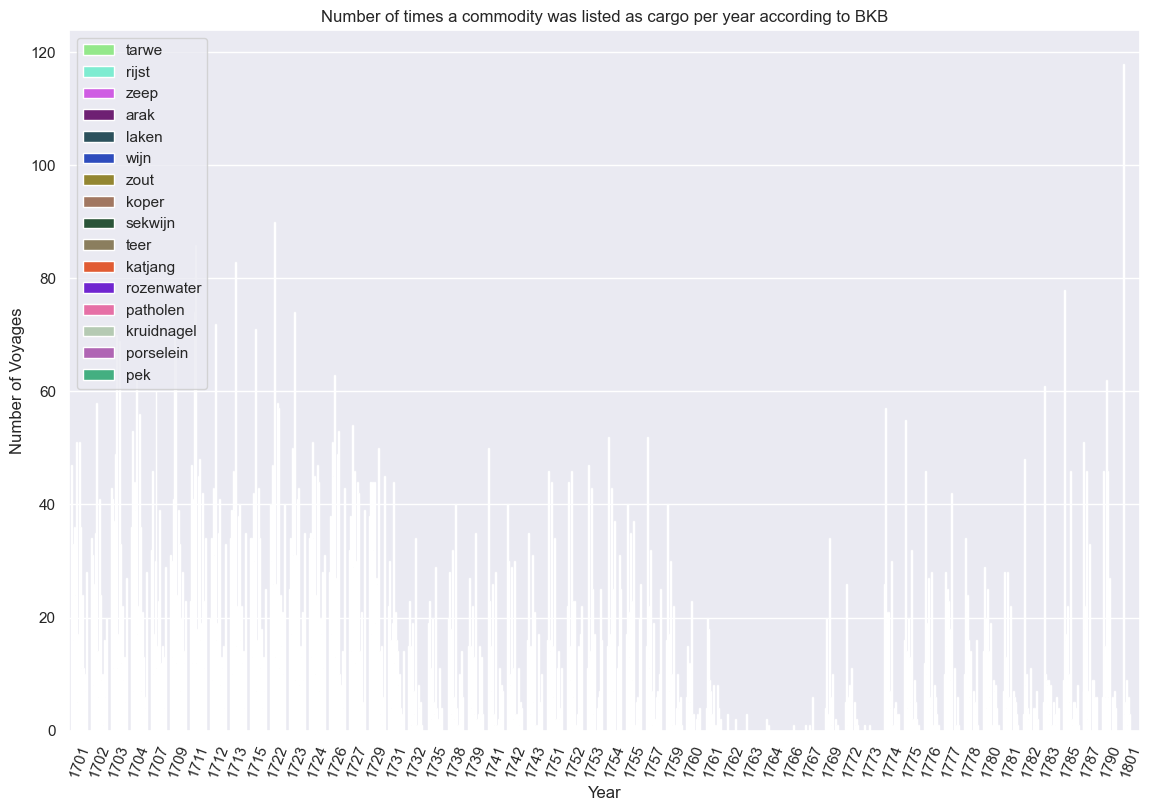

In [36]:
# Bar plot 
dss = pd.concat([tarwe_counter, rijst_counter, zeep_counter, arak_counter, laken_counter,wijn_counter,zout_counter,koper_counter,sekwijn_counter,teer_counter,katjang_counter, rozenwater_counter,patholen_counter,kruidnagel_counter,porselein_counter,pek_counter])
dss.voyBookingYear = dss.voyBookingYear.astype(int)
#dss = dss[(dss['voyBookingYear'] < 1768)]

sns.set(rc={'figure.figsize':(11.7,8.27)})
#commodities_palette = ['pink','green', 'yellow','']

#commodities_palette =sns.set_palette("deep")

# Generate random colors
num_colors = 16  # Same as the number of columns
random_colors = generate_random_colors(num_colors)

# Set the random color palette
commodities_palette =sns.set_palette(random_colors)

ax = sns.barplot(x='voyBookingYear', y='counts', palette=commodities_palette, hue='naam', data=dss)
ax.set(xlabel='Year', ylabel='Number of Voyages', title='Number of times a commodity was listed as cargo per year according to BKB')
plt.legend(title="")
plt.xticks(rotation=70)
plt.tight_layout()

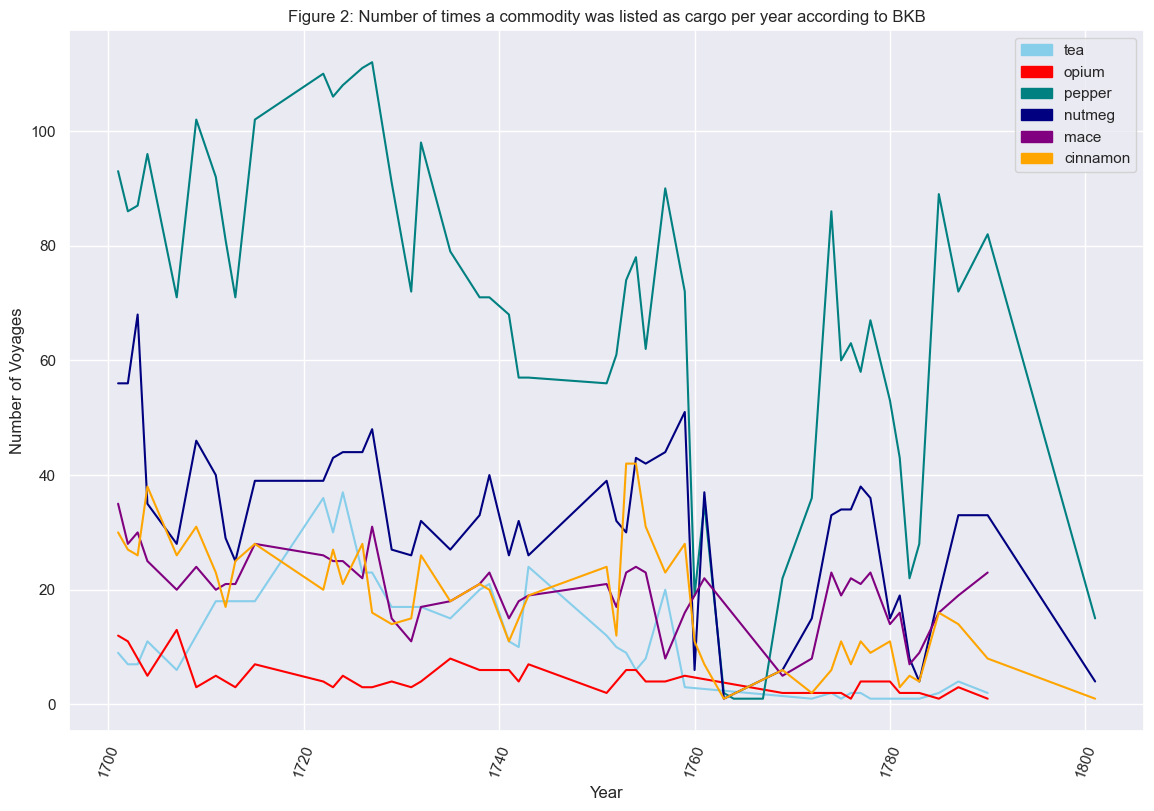

In [17]:
# Number of voyages as line plot  
ax = sns.lineplot(x='voyBookingYear', y='counts', data=tea_counter, color='skyblue')
sns.lineplot(x='voyBookingYear', y='counts', data=opium_counter, color='red')
sns.lineplot(x='voyBookingYear', y='counts', data=peper_counter, color='teal')
sns.lineplot(x='voyBookingYear', y='counts', data=nootmuskaat_counter, color='navy')
sns.lineplot(x='voyBookingYear', y='counts', data=foelie_counter, color='purple')
sns.lineplot(x='voyBookingYear', y='counts', data=kaneel_counter, color='orange')
ax.set(xlabel='Year', ylabel='Number of Voyages', title='Figure 2: Number of times a commodity was listed as cargo per year according to BKB')

tea_patch = mpatches.Patch(color='skyblue', label='tea')
opium_patch = mpatches.Patch(color='red', label='opium')
pepper_patch = mpatches.Patch(color='teal', label='pepper')
nutmeg_patch = mpatches.Patch(color='navy', label='nutmeg')
mace_patch = mpatches.Patch(color='purple', label='mace')
cinnamon_patch = mpatches.Patch(color='orange', label='cinnamon')
ax.legend(handles=[tea_patch, opium_patch, pepper_patch, nutmeg_patch, mace_patch, cinnamon_patch])
plt.xticks(rotation=70)
plt.tight_layout()

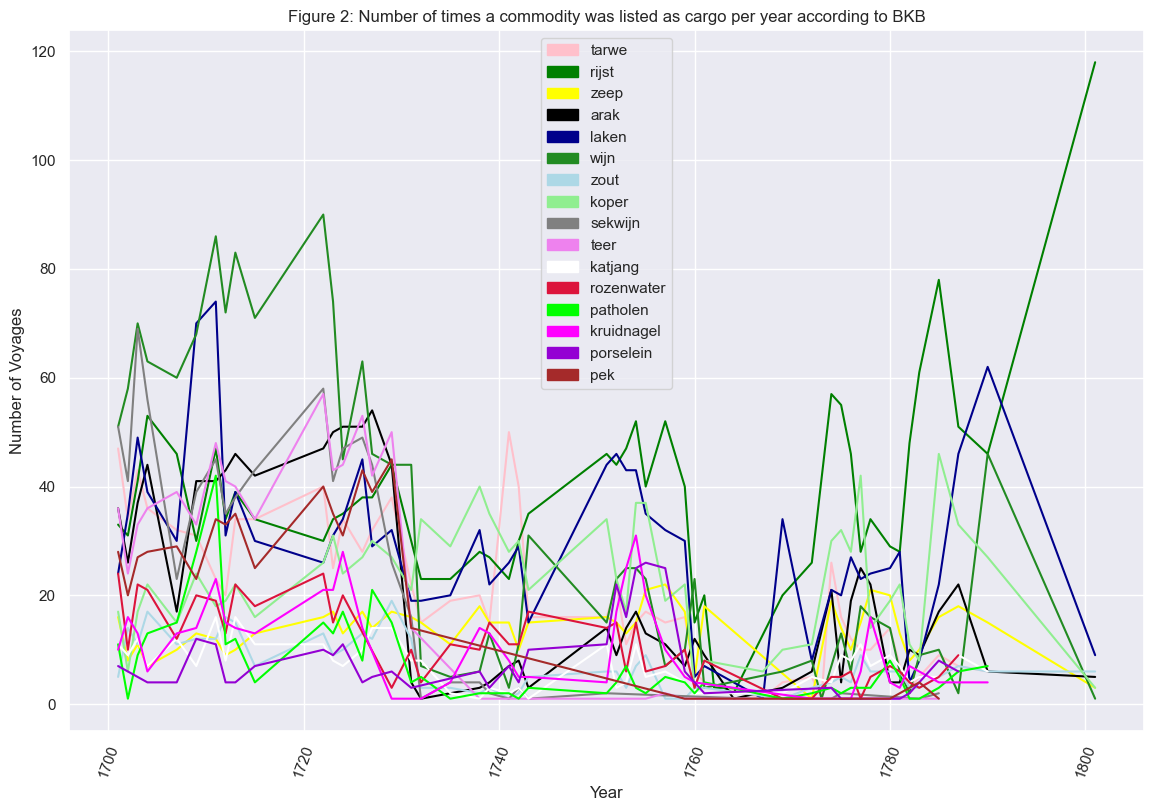

In [45]:
ax = sns.lineplot(x='voyBookingYear', y='counts', data=tarwe_counter, color='pink')
sns.lineplot(x='voyBookingYear', y='counts', data=rijst_counter, color='green')
sns.lineplot(x='voyBookingYear', y='counts', data=zeep_counter, color='yellow')
sns.lineplot(x='voyBookingYear', y='counts', data=arak_counter, color='black')
sns.lineplot(x='voyBookingYear', y='counts', data=laken_counter, color='darkblue')
sns.lineplot(x='voyBookingYear', y='counts', data=wijn_counter, color='forestgreen')
sns.lineplot(x='voyBookingYear', y='counts', data=zout_counter, color='lightblue')
sns.lineplot(x='voyBookingYear', y='counts', data=koper_counter, color='lightgreen')
sns.lineplot(x='voyBookingYear', y='counts', data=sekwijn_counter, color='grey')
sns.lineplot(x='voyBookingYear', y='counts', data=teer_counter, color='violet')
sns.lineplot(x='voyBookingYear', y='counts', data=katjang_counter, color='white')
sns.lineplot(x='voyBookingYear', y='counts', data=rozenwater_counter, color='crimson')
sns.lineplot(x='voyBookingYear', y='counts', data=patholen_counter, color='lime')
sns.lineplot(x='voyBookingYear', y='counts', data=kruidnagel_counter, color='magenta')
sns.lineplot(x='voyBookingYear', y='counts', data=porselein_counter, color='darkviolet')
sns.lineplot(x='voyBookingYear', y='counts', data=pek_counter, color='brown')

ax.set(xlabel='Year', ylabel='Number of Voyages', title='Figure 2: Number of times a commodity was listed as cargo per year according to BKB')

tarwe_patch = mpatches.Patch(color='pink', label='tarwe')
rijst_patch = mpatches.Patch(color='green', label='rijst')
zeep_patch = mpatches.Patch(color='yellow', label='zeep')

arak_patch = mpatches.Patch(color='black', label='arak')
laken_patch = mpatches.Patch(color='darkblue', label='laken')
wijn_patch = mpatches.Patch(color='forestgreen', label='wijn')
zout_patch = mpatches.Patch(color='lightblue', label='zout')
koper_patch = mpatches.Patch(color='lightgreen', label='koper')
sekwijn_patch = mpatches.Patch(color='grey', label='sekwijn')
teer_patch = mpatches.Patch(color='violet', label='teer')
katjang_patch = mpatches.Patch(color='white', label='katjang')
rozenwater_patch = mpatches.Patch(color='crimson', label='rozenwater')
patholen_patch = mpatches.Patch(color='lime', label='patholen')
kruidnagel_patch = mpatches.Patch(color='magenta', label='kruidnagel')
porselein_patch = mpatches.Patch(color='darkviolet', label='porselein')
pek_patch = mpatches.Patch(color='brown', label='pek')


ax.legend(handles=[tarwe_patch, rijst_patch, zeep_patch, arak_patch, laken_patch, wijn_patch, zout_patch, koper_patch,
                  sekwijn_patch,teer_patch, katjang_patch, rozenwater_patch, patholen_patch, kruidnagel_patch, porselein_patch, pek_patch])
plt.xticks(rotation=70)
plt.tight_layout()

In [14]:
# the number of times something is traded is one thing, but how about its value? 
# First mash up some data to get the average value of a commodity per year 
#peper_rows = pruned_dataframe.loc[pruned_dataframe['naam'] == 'peper']
peper_value_per_year = peper_rows.groupby('voyBookingYear', as_index=False)['carValueGuldens'].mean()
#foelie_rows = pruned_dataframe.loc[pruned_dataframe['naam'] == 'foelie']
foelie_value_per_year = foelie_rows.groupby('voyBookingYear', as_index=False)['carValueGuldens'].mean()
#nootmuskaat_rows = pruned_dataframe.loc[pruned_dataframe['naam'] == 'nootmuskaat']
nootmuskaat_value_per_year = nootmuskaat_rows.groupby('voyBookingYear', as_index=False)['carValueGuldens'].mean()
kaneel_value_per_year = kaneel_rows.groupby('voyBookingYear', as_index=False)['carValueGuldens'].mean()
opium_value_per_year = opium_rows.groupby('voyBookingYear', as_index=False)['carValueGuldens'].mean()
tea_value_per_year = tea_rows.groupby('voyBookingYear', as_index=False)['carValueGuldens'].mean()

tea_value_per_year['naam']='thee'
kaneel_value_per_year['naam']='cinnamon'
opium_value_per_year['naam']='opium'
peper_value_per_year['naam']='pepper'
foelie_value_per_year['naam']='mace'
nootmuskaat_value_per_year['naam']='nutmeg'

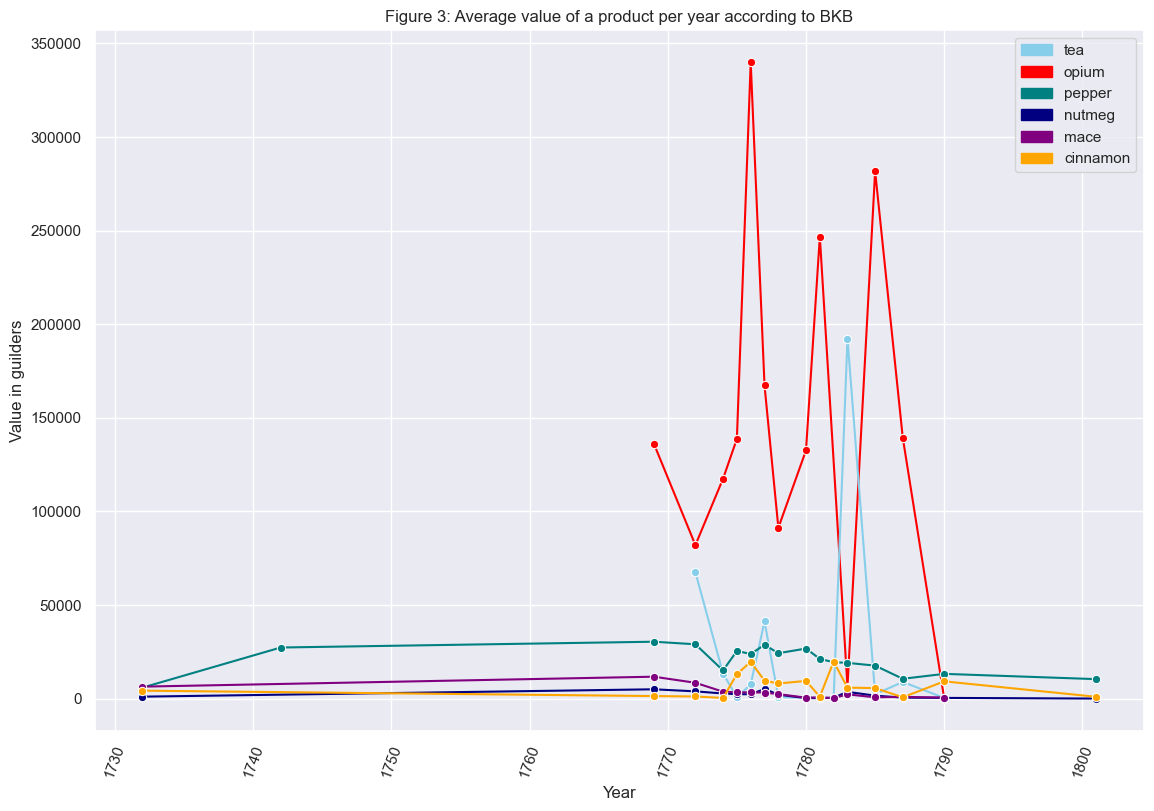

In [18]:
# Plot the values per year 
ax = sns.lineplot(x='voyBookingYear', y='carValueGuldens', data=opium_value_per_year, color='red', marker="o")
sns.lineplot(x='voyBookingYear', y='carValueGuldens', data=tea_value_per_year, color='skyblue', marker="o")
sns.lineplot(x='voyBookingYear', y='carValueGuldens', data=peper_value_per_year, color='teal', marker="o")
sns.lineplot(x='voyBookingYear', y='carValueGuldens', data=nootmuskaat_value_per_year, color='navy', marker="o")
sns.lineplot(x='voyBookingYear', y='carValueGuldens', data=foelie_value_per_year, color='purple', marker="o")
sns.lineplot(x='voyBookingYear', y='carValueGuldens', data=kaneel_value_per_year, color='orange', marker="o")
ax.set(xlabel='Year', ylabel='Value in guilders', title='Figure 3: Average value of a product per year according to BKB')

tea_patch = mpatches.Patch(color='skyblue', label='tea')
opium_patch = mpatches.Patch(color='red', label='opium')
pepper_patch = mpatches.Patch(color='teal', label='pepper')
nutmeg_patch = mpatches.Patch(color='navy', label='nutmeg')
mace_patch = mpatches.Patch(color='purple', label='mace')
cinnamon_patch = mpatches.Patch(color='orange', label='cinnamon')
ax.legend(handles=[tea_patch,opium_patch, pepper_patch, nutmeg_patch, mace_patch, cinnamon_patch])
plt.title('Figure 3: Average value of a product per year according to BKB')
plt.xticks(rotation=70)
plt.tight_layout()

In [23]:
tarwe_value_per_year = tarwe_rows.groupby('voyBookingYear', as_index=False)['carValueGuldens'].mean()
rijst_value_per_year = rijst_rows.groupby('voyBookingYear', as_index=False)['carValueGuldens'].mean()
zeep_value_per_year = zeep_rows.groupby('voyBookingYear', as_index=False)['carValueGuldens'].mean()

tarwe_value_per_year['naam']='tarwe'
rijst_value_per_year['naam']='rijst'
zeep_value_per_year['naam']='zeep'

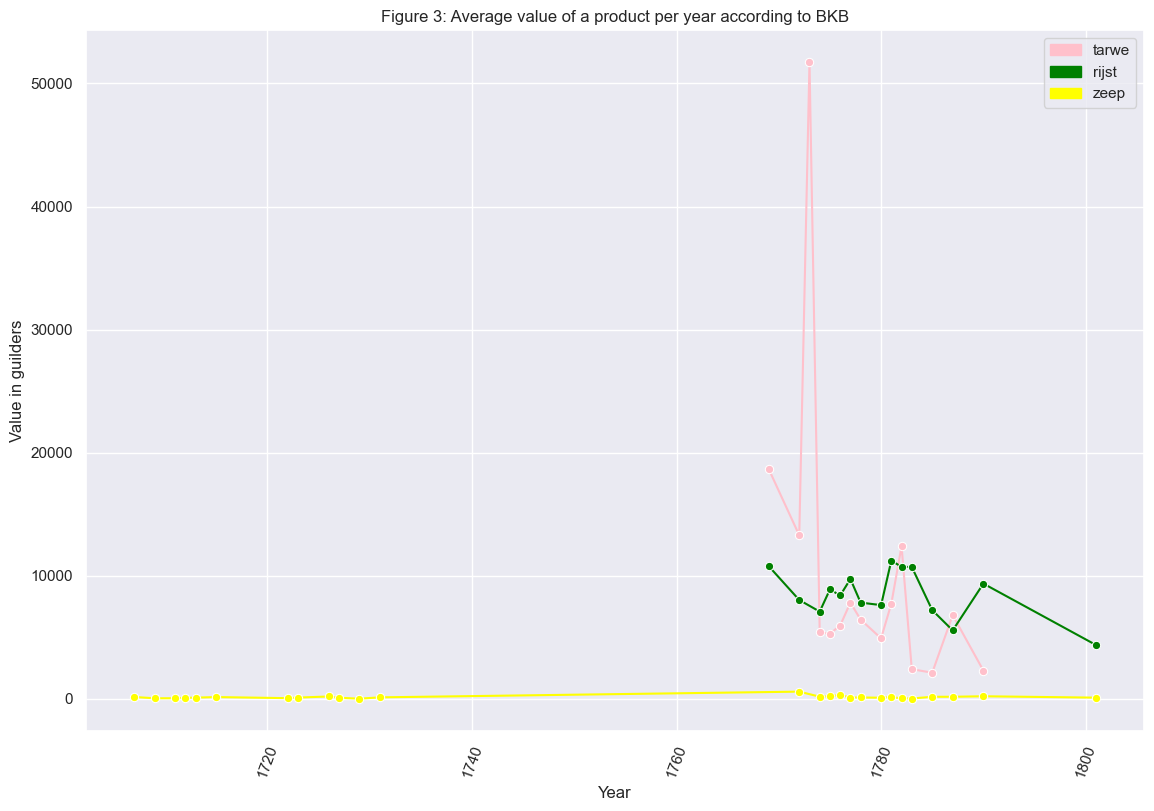

In [24]:
ax = sns.lineplot(x='voyBookingYear', y='carValueGuldens', data=tarwe_value_per_year, color='pink', marker="o")
sns.lineplot(x='voyBookingYear', y='carValueGuldens', data=rijst_value_per_year, color='green', marker="o")
sns.lineplot(x='voyBookingYear', y='carValueGuldens', data=zeep_value_per_year, color='yellow', marker="o")
ax.set(xlabel='Year', ylabel='Value in guilders', title='Figure 3: Average value of a product per year according to BKB')

tarwe_patch = mpatches.Patch(color='pink', label='tarwe')
rijst_patch = mpatches.Patch(color='green', label='rijst')
zeep_patch = mpatches.Patch(color='yellow', label='zeep')

ax.legend(handles=[tarwe_patch,rijst_patch, zeep_patch])
plt.title('Figure 3: Average value of a product per year according to BKB')
plt.xticks(rotation=70)
plt.tight_layout()

In [46]:
tarwe_value_per_year = tarwe_rows.groupby('voyBookingYear', as_index=False)['carValueGuldens'].mean()
rijst_value_per_year = rijst_rows.groupby('voyBookingYear', as_index=False)['carValueGuldens'].mean()
zeep_value_per_year = zeep_rows.groupby('voyBookingYear', as_index=False)['carValueGuldens'].mean()
arak_value_per_year = arak_rows.groupby('voyBookingYear', as_index=False)['carValueGuldens'].mean()
laken_value_per_year = laken_rows.groupby('voyBookingYear', as_index=False)['carValueGuldens'].mean()
wijn_value_per_year = wijn_rows.groupby('voyBookingYear', as_index=False)['carValueGuldens'].mean()
zout_value_per_year = zout_rows.groupby('voyBookingYear', as_index=False)['carValueGuldens'].mean()
koper_value_per_year = koper_rows.groupby('voyBookingYear', as_index=False)['carValueGuldens'].mean()
sekwijn_value_per_year = sekwijn_rows.groupby('voyBookingYear', as_index=False)['carValueGuldens'].mean()
teer_value_per_year = teer_rows.groupby('voyBookingYear', as_index=False)['carValueGuldens'].mean()
katjang_value_per_year = katjang_rows.groupby('voyBookingYear', as_index=False)['carValueGuldens'].mean()
rozenwater_value_per_year = rozenwater_rows.groupby('voyBookingYear', as_index=False)['carValueGuldens'].mean()
patholen_value_per_year = patholen_rows.groupby('voyBookingYear', as_index=False)['carValueGuldens'].mean()
kruidnagel_value_per_year = kruidnagel_rows.groupby('voyBookingYear', as_index=False)['carValueGuldens'].mean()
porselein_value_per_year = porselein_rows.groupby('voyBookingYear', as_index=False)['carValueGuldens'].mean()
pek_value_per_year = pek_rows.groupby('voyBookingYear', as_index=False)['carValueGuldens'].mean()


tarwe_value_per_year['naam']='tarwe'
rijst_value_per_year['naam']='rijst'
zeep_value_per_year['naam']='zeep'

arak_value_per_year['naam']='arak'
laken_value_per_year['naam']='laken'
wijn_value_per_year['naam']='wijn'
zout_value_per_year['naam']='zout'
koper_value_per_year['naam']='koper'
sekwijn_value_per_year['naam']='sekwijn'
teer_value_per_year['naam']='teer'
katjang_value_per_year['naam']='katjang'
rozenwater_value_per_year['naam']='rozenwater'
patholen_value_per_year['naam']='tpatholen'
kruidnagel_value_per_year['naam']='kruidnagel'
porselein_value_per_year['naam']='porselein'
pek_value_per_year['naam']='pek'

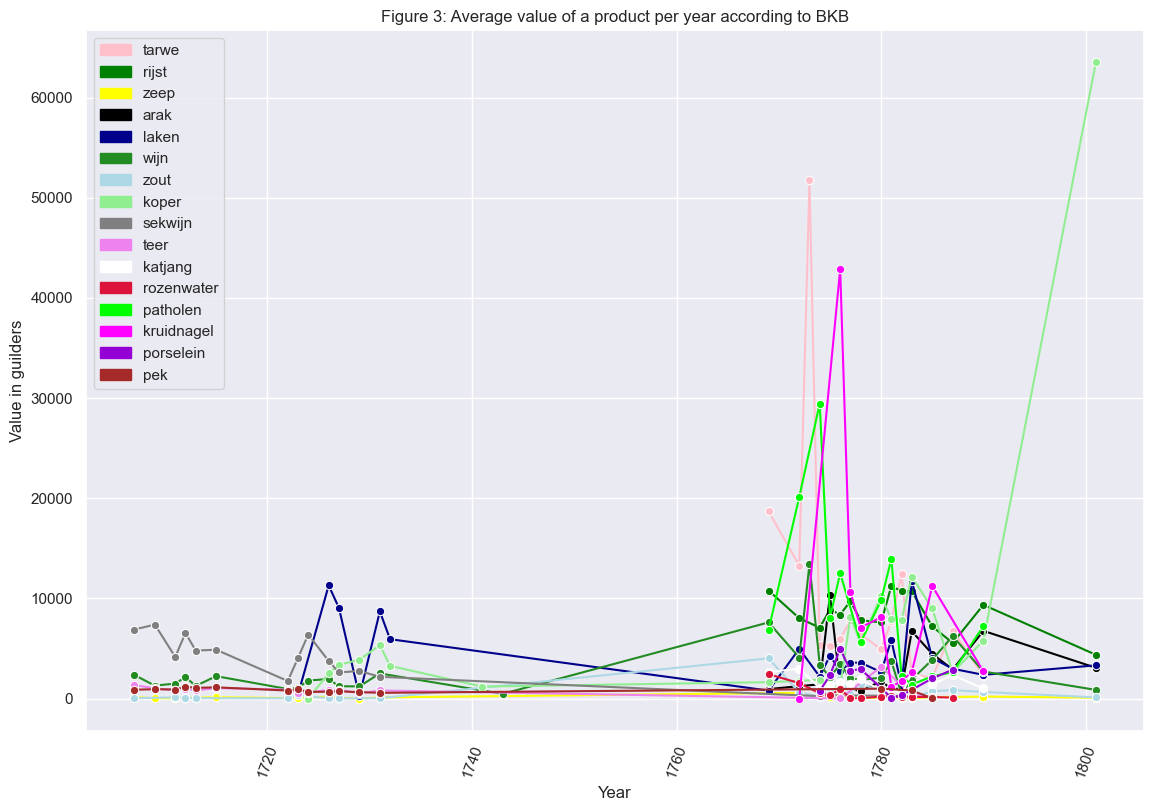

In [48]:
ax = sns.lineplot(x='voyBookingYear', y='carValueGuldens', data=tarwe_value_per_year, color='pink', marker="o")
sns.lineplot(x='voyBookingYear', y='carValueGuldens', data=rijst_value_per_year, color='green', marker="o")
sns.lineplot(x='voyBookingYear', y='carValueGuldens', data=zeep_value_per_year, color='yellow', marker="o")
sns.lineplot(x='voyBookingYear', y='carValueGuldens', data=arak_value_per_year, color='black', marker="o")
sns.lineplot(x='voyBookingYear', y='carValueGuldens', data=laken_value_per_year, color='darkblue', marker="o")
sns.lineplot(x='voyBookingYear', y='carValueGuldens', data=wijn_value_per_year, color='forestgreen', marker="o")
sns.lineplot(x='voyBookingYear', y='carValueGuldens', data=zout_value_per_year, color='lightblue', marker="o")
sns.lineplot(x='voyBookingYear', y='carValueGuldens', data=koper_value_per_year, color='lightgreen', marker="o")
sns.lineplot(x='voyBookingYear', y='carValueGuldens', data=sekwijn_value_per_year, color='grey', marker="o")
sns.lineplot(x='voyBookingYear', y='carValueGuldens', data=teer_value_per_year, color='violet', marker="o")
sns.lineplot(x='voyBookingYear', y='carValueGuldens', data=katjang_value_per_year, color='white', marker="o")
sns.lineplot(x='voyBookingYear', y='carValueGuldens', data=rozenwater_value_per_year, color='crimson', marker="o")
sns.lineplot(x='voyBookingYear', y='carValueGuldens', data=patholen_value_per_year, color='lime', marker="o")
sns.lineplot(x='voyBookingYear', y='carValueGuldens', data=kruidnagel_value_per_year, color='magenta', marker="o")
sns.lineplot(x='voyBookingYear', y='carValueGuldens', data=porselein_value_per_year, color='darkviolet', marker="o")
sns.lineplot(x='voyBookingYear', y='carValueGuldens', data=pek_value_per_year, color='brown', marker="o")

ax.set(xlabel='Year', ylabel='Value in guilders', title='Figure 3: Average value of a product per year according to BKB')

tarwe_patch = mpatches.Patch(color='pink', label='tarwe')
rijst_patch = mpatches.Patch(color='green', label='rijst')
zeep_patch = mpatches.Patch(color='yellow', label='zeep')
arak_patch = mpatches.Patch(color='black', label='arak')
laken_patch = mpatches.Patch(color='darkblue', label='laken')
wijn_patch = mpatches.Patch(color='forestgreen', label='wijn')
zout_patch = mpatches.Patch(color='lightblue', label='zout')
koper_patch = mpatches.Patch(color='lightgreen', label='koper')
sekwijn_patch = mpatches.Patch(color='grey', label='sekwijn')
teer_patch = mpatches.Patch(color='violet', label='teer')
katjang_patch = mpatches.Patch(color='white', label='katjang')
rozenwater_patch = mpatches.Patch(color='crimson', label='rozenwater')
patholen_patch = mpatches.Patch(color='lime', label='patholen')
kruidnagel_patch = mpatches.Patch(color='magenta', label='kruidnagel')
porselein_patch = mpatches.Patch(color='darkviolet', label='porselein')
pek_patch = mpatches.Patch(color='brown', label='pek')




ax.legend(handles=[tarwe_patch,rijst_patch, zeep_patch, arak_patch, laken_patch, wijn_patch, zout_patch, koper_patch,
                  sekwijn_patch,teer_patch, katjang_patch, rozenwater_patch, patholen_patch, kruidnagel_patch, porselein_patch, pek_patch])
plt.title('Figure 3: Average value of a product per year according to BKB')
plt.xticks(rotation=70)
plt.tight_layout()